In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

# kBioReg vs Prosite Scanner

In [9]:
benchmark_df = pd.read_csv("/Users/rschwab/repos/kBioReg/data/RESULTS/pdb_alphamods_results.csv")

In [6]:
benchmark_df["TOTAL"] = pd.Series(benchmark_df.LOAD+benchmark_df.SEARCH)

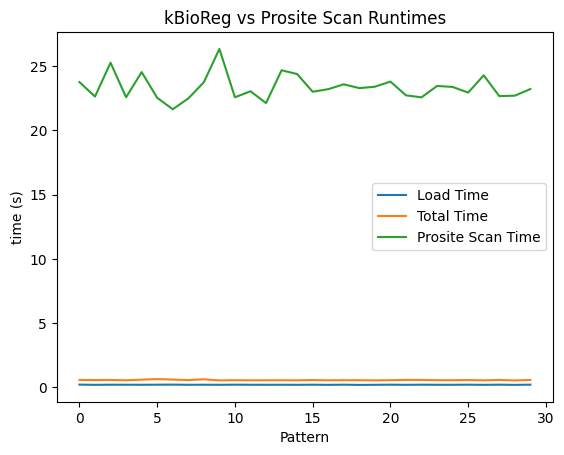

In [10]:
plt.title("kBioReg vs Prosite Scan Runtimes")

plt.plot(range(30), benchmark_df.LOAD, label="Load Time")
plt.plot(range(30), benchmark_df.TOTAL, label="Total Time")
plt.plot(range(30), benchmark_df.PS_SCAN, label="Prosite Scan Time")

plt.xlabel('Pattern')
plt.ylabel('time (s)')
plt.legend()
plt.savefig("pdb_scan.png")
plt.show()

# Multithreading Comparison

In [52]:
t1 = pd.read_csv("/Users/rschwab/repos/kBioReg/data/RESULTS/simple_queries_benchmarks_t1.csv")
t2 = pd.read_csv("/Users/rschwab/repos/kBioReg/data/RESULTS/simple_queries_benchmarks_t2.csv")
t4 = pd.read_csv("/Users/rschwab/repos/kBioReg/data/RESULTS/simple_queries_benchmarks_t4.csv")
t8 = pd.read_csv("/Users/rschwab/repos/kBioReg/data/RESULTS/simple_queries_benchmarks_t8.csv")
real_ps = pd.read_csv("/Users/rschwab/repos/kBioReg/real_timings.csv")

In [53]:
t1_exec_time = t1.TOTAL-t1.LOAD
t2_exec_time = t2.TOTAL-t2.LOAD
t4_exec_time = t4.TOTAL-t4.LOAD
t8_exec_time = t8.TOTAL-t8.LOAD

In [54]:
exec_df = pd.DataFrame(list(zip(t1_exec_time, t2_exec_time, t4_exec_time, t8_exec_time)))
exec_df.columns = ["T1", "T2", "T4", "T8"]
exec_df["ProSite"] = real_ps.ProSite

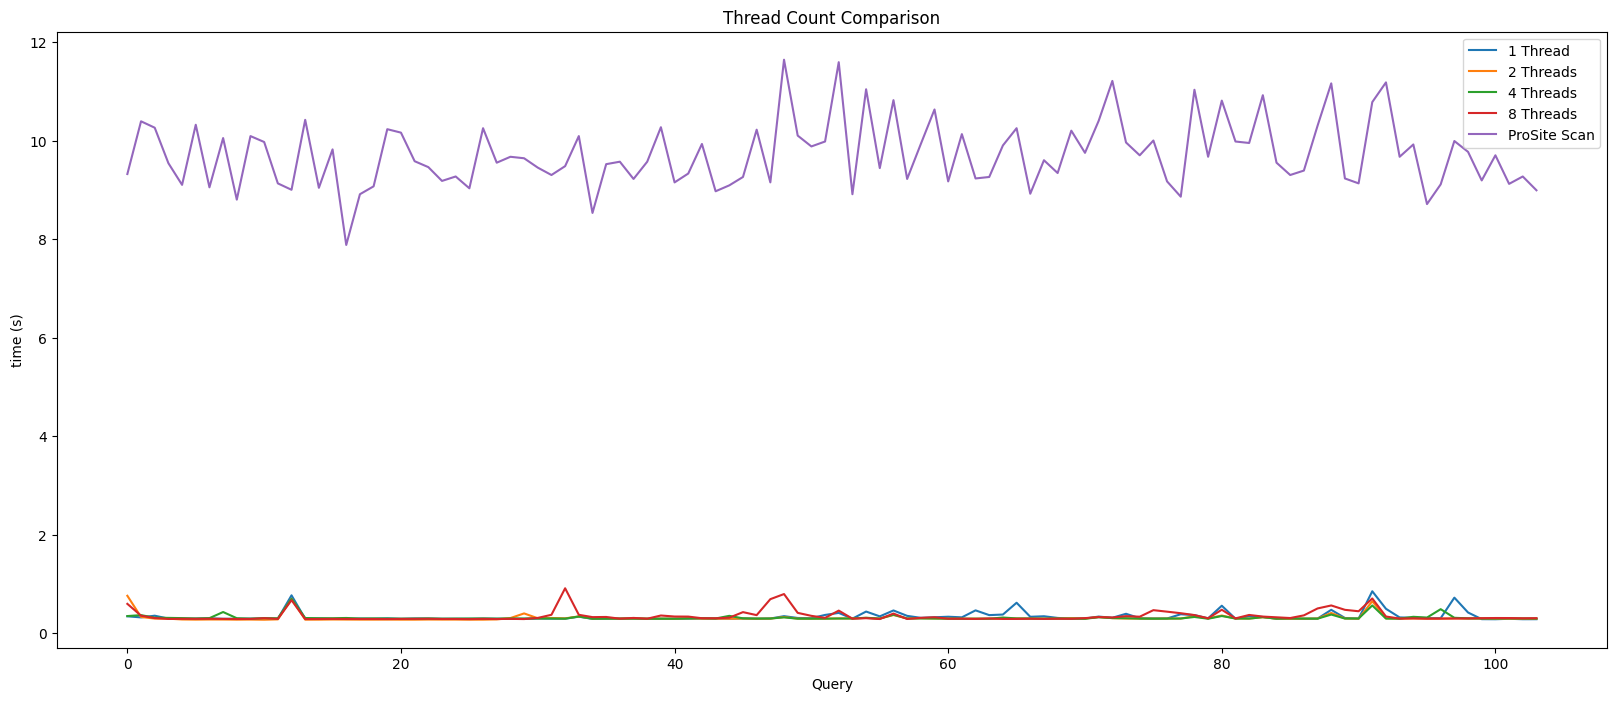

In [67]:
figure(figsize=(20,8))
plt.title("Thread Count Comparison")

plt.plot(range(104), exec_df.T1, label="1 Thread")
plt.plot(range(104), exec_df.T2, label="2 Threads")
plt.plot(range(104), exec_df.T4, label="4 Threads")
plt.plot(range(104), exec_df.T8, label="8 Threads")
plt.plot(range(104), exec_df.ProSite, label="ProSite Scan")

plt.xlabel('Query')
plt.ylabel('time (s)')
plt.legend()

# Reduced Alphabet Comparisons